In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
path = '/kaggle/input/realfake-job-prediction/fake_job_postings.csv'
data = pd.read_csv(path)

In [29]:
data.head(20)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [30]:
data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [32]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_data[missing_data["Missing Values"] > 0])

                     Missing Values  Percentage
location                        346    1.935123
department                    11547   64.580537
salary_range                  15012   83.959732
company_profile                3308   18.501119
description                       1    0.005593
requirements                   2696   15.078300
benefits                       7212   40.335570
employment_type                3471   19.412752
required_experience            7050   39.429530
required_education             8105   45.329978
industry                       4903   27.421700
function                       6455   36.101790


In [33]:
numerical_columns = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

categorical_columns = ['title', 'location', 'department', 'salary_range',
                       'company_profile', 'description', 'requirements',
                       'benefits', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function']

for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        if col in ['company_profile', 'description']:
            data[col].fillna("Not Provided", inplace=True)
        else:
            data[col].fillna("Unknown", inplace=True)

for col in categorical_columns:
    data[f"{col}_missing"] = data[col].isnull().astype(int)

print(data.isnull().sum())

job_id                         0
title                          0
location                       0
department                     0
salary_range                   0
company_profile                0
description                    0
requirements                   0
benefits                       0
telecommuting                  0
has_company_logo               0
has_questions                  0
employment_type                0
required_experience            0
required_education             0
industry                       0
function                       0
fraudulent                     0
title_missing                  0
location_missing               0
department_missing             0
salary_range_missing           0
company_profile_missing        0
description_missing            0
requirements_missing           0
benefits_missing               0
employment_type_missing        0
required_experience_missing    0
required_education_missing     0
industry_missing               0
function_m

In [34]:
for col in categorical_columns:
    missing_col = f"{col}_missing"
    if missing_col in data.columns:
        data.drop(columns=[missing_col], inplace=True)

print(data.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [35]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [36]:
unique_counts = data.nunique()
print(unique_counts)

job_id                 17880
title                  11231
location                3106
department              1337
salary_range             875
company_profile         1710
description            14802
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
dtype: int64


In [37]:
binary_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

for col in binary_columns:
    data[col] = data[col].astype(int)

print(data.dtypes)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


In [38]:
data['telecommuting'].unique()

array([0, 1])

In [39]:
 from sklearn.preprocessing import LabelEncoder

ordinal_cols = ['required_experience', 'required_education', 'salary_range']

label_encoder = LabelEncoder()
for col in ordinal_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))


In [40]:
nominal_cols = ['title', 'location', 'department', 'company_profile', 'description',
                'requirements', 'benefits', 'employment_type', 'industry', 'function']

data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)
print(data.head())

   job_id  salary_range  telecommuting  has_company_logo  has_questions  \
0       1           874              0                 1              0   
1       2           874              0                 1              0   
2       3           874              0                 1              0   
3       4           874              0                 1              0   
4       5           874              0                 1              1   

   required_experience  required_education  fraudulent  \
0                    4                   9           0   
1                    6                   9           0   
2                    7                   9           0   
3                    5                   1           0   
4                    5                   1           0   

   title_   Environmental Technician I  title_   Piping Material Engineer  \
0                                False                              False   
1                                False        

In [41]:
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data.head())


     job_id  salary_range  telecommuting  has_company_logo  has_questions  \
0 -1.731954      0.365446      -0.211707           0.50733      -0.983580   
1 -1.731760      0.365446      -0.211707           0.50733      -0.983580   
2 -1.731566      0.365446      -0.211707           0.50733      -0.983580   
3 -1.731373      0.365446      -0.211707           0.50733      -0.983580   
4 -1.731179      0.365446      -0.211707           0.50733       1.016694   

   required_experience  required_education  fraudulent  \
0            -0.248399            0.841300   -0.225609   
1             0.537615            0.841300   -0.225609   
2             0.930622            0.841300   -0.225609   
3             0.144608           -1.309926   -0.225609   
4             0.144608           -1.309926   -0.225609   

   title_   Environmental Technician I  title_   Piping Material Engineer  \
0                                False                              False   
1                                F

In [42]:
from sklearn.model_selection import train_test_split

target_column = 'fraudulent'
X = data.drop(columns=[target_column])
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (14304, 50532)
Testing set shape: (3576, 50532)


In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  
y_test = encoder.transform(y_test) 

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [45]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size = 32,
                    validation_data=(X_test, y_test),
                    )

Epoch 1/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9550 - loss: 0.1901 - val_accuracy: 0.9787 - val_loss: 0.0582
Epoch 2/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9923 - loss: 0.0221 - val_accuracy: 0.9821 - val_loss: 0.0463
Epoch 3/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9793 - val_loss: 0.0526
Epoch 4/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.3473e-04 - val_accuracy: 0.9793 - val_loss: 0.0508
Epoch 5/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 6.1784e-05 - val_accuracy: 0.9796 - val_loss: 0.0509
Epoch 6/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.1802e-05 - val_accuracy: 0.9746 - val_loss: 0.0610
Epoch 7/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.0406e-05 - val_accuracy: 0.9787 - val_loss: 0.0552
Epoch 8/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 1.1839e-

In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9685 - loss: 0.0834

Test Accuracy: 0.9706


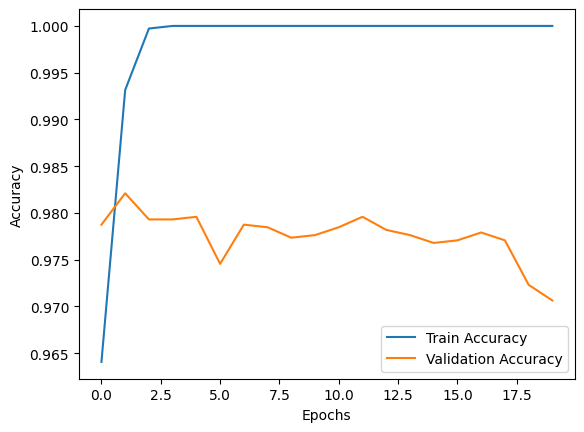

In [49]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

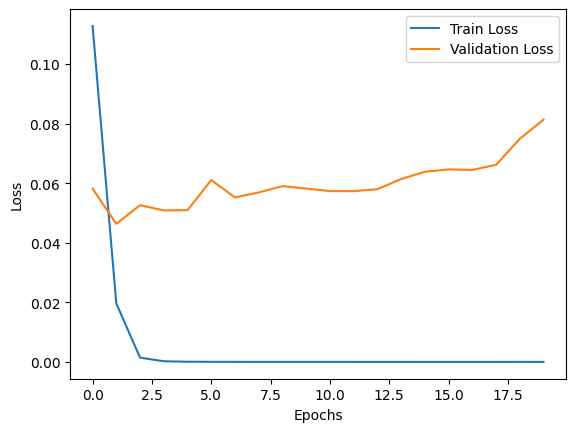

In [50]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()